<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/The%20Market's%20Not%20Normal/The_Market's_Not_Normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Market's Not Normal
---
## Preamble

Hi, this is the first "walk-through" in my project _Financial Data Science in Python_. You can read about what this project is in my article on Medium [Financial Data Science in Python](https://medium.com/adventures-in-data-science/financial-data-science-in-python-ee66dab460cf).

To execute the code in this notebook, you're going to need to upload the my_library.py file from the associated GitHub repository (because Google will delete it when the virtual machine goes away, and so it's likely no longer available here). This is easy, but nothing will work without it.

Once that is done, execute the next cell...

In [1]:
from my_library import *

20:27:31 Starting...
20:27:31 Installing yfinance into Google notebook...
20:27:41 Installing arch into Google notebook...
20:27:56 Initialized.


## First, Get All of the Data
We're going to load data for the S&P 500 Index from _Yahoo! Finance_ into a dataframe. This is done by the `download()` function of the `yfinance` package that should have already been installed by executing the first cell. (You did that, right?) The ticker for the index is `^GSPC` -- I don't know why.

In [3]:
ticker,begin,end='^GSPC','1928-01-27',today('%Y-%m-%d')
df=download(ticker,begin,end).dropna()
df['Daily Return']=df['Adj Close'].pct_change()*hundred
df['Intraday Return']=df['Close']/df['Open']*hundred-hundred
df['Overnight Return']=(hundred+df["Daily Return"])/(hundred+df["Intraday Return"])*hundred-hundred
df.index=pd.DatetimeIndex(df.index).to_period('B')
df.dropna(inplace=True)
df.loc[df["Volume"]==0,"Volume"]=np.nan
display(df)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Daily Return,Intraday Return,Overnight Return
Date,,,,,,,,,
1928-01-30,17.490000,17.490000,17.490000,17.490000,17.490000,NaN,-1.130587,0.000000,-1.130587
1928-01-31,17.570000,17.570000,17.570000,17.570000,17.570000,NaN,0.457404,0.000000,0.457404
1928-02-01,17.530001,17.530001,17.530001,17.530001,17.530001,NaN,-0.227655,0.000000,-0.227655
1928-02-02,17.629999,17.629999,17.629999,17.629999,17.629999,NaN,0.570442,0.000000,0.570442
1928-02-03,17.400000,17.400000,17.400000,17.400000,17.400000,NaN,-1.304592,0.000000,-1.304592
...,...,...,...,...,...,...,...,...,...
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2.748450e+09,0.143046,0.170315,-0.027222
2023-12-28,4786.439941,4793.299805,4780.979980,4783.350098,4783.350098,2.698860e+09,0.037017,-0.064554,0.101637
2023-12-29,4782.879883,4788.430176,4751.990234,4769.830078,4769.830078,3.126060e+09,-0.282648,-0.272844,-0.009830


Ok, so there's a lot more than just `download('^GSPC','1928-01-27',today)` going on in that cell, so let's take a deeper look. First, yes, we just call the `yfinance` method that fetches daily data from _Yahoo! Finance_. That's pretty straightforward. We then decorate the returned data-frame with extra return data, taking care to use the `'Adj Close'` column to compute daily returns. As this is a market index, we don't need to worry about dividends but we do need to care about "rebasing" of an index, if that has occurred, and the `'Adj Close'` column is the one that takes care of all of that stuff. I fix the index to business days, via `.to_period('B')`, and drop `NA` records (which will potentially mess up future analytical codes). Note that we drop `NA`'s both _before_ computing returns, so we _elide_ over holiday records that might contain `NA` in the pricing data, and also afterwards, to clean up the data-frame as mentioned. Finally, because this is a feature of this data set, we change `0` records for `'Volume'` into the `NA`'s they should be returned as (the total volume data for the index constituents is not available early on in the data set, but the prices are still valid).

### Always, Look at the Data
I've already done one, key, step in validating the data returned is "ok" - that is to print it to a terminal and look at the numbers. My process actually involves more in-depth analysis that just the `display(df)` code exhibited, but that is clearly a necessary, if not sufficient, part.
But this is a lot of data, so let's make a picture.

But this is _a lot_ of data, so let's make a picture. To do that I'm going to use a recipe for `matplotlib` which will become very familiar. I've often wondered if I should abstract this into a plotting function, but every plot seems to require its own special stirring, so I'm just going to type the same commands again and again and again.

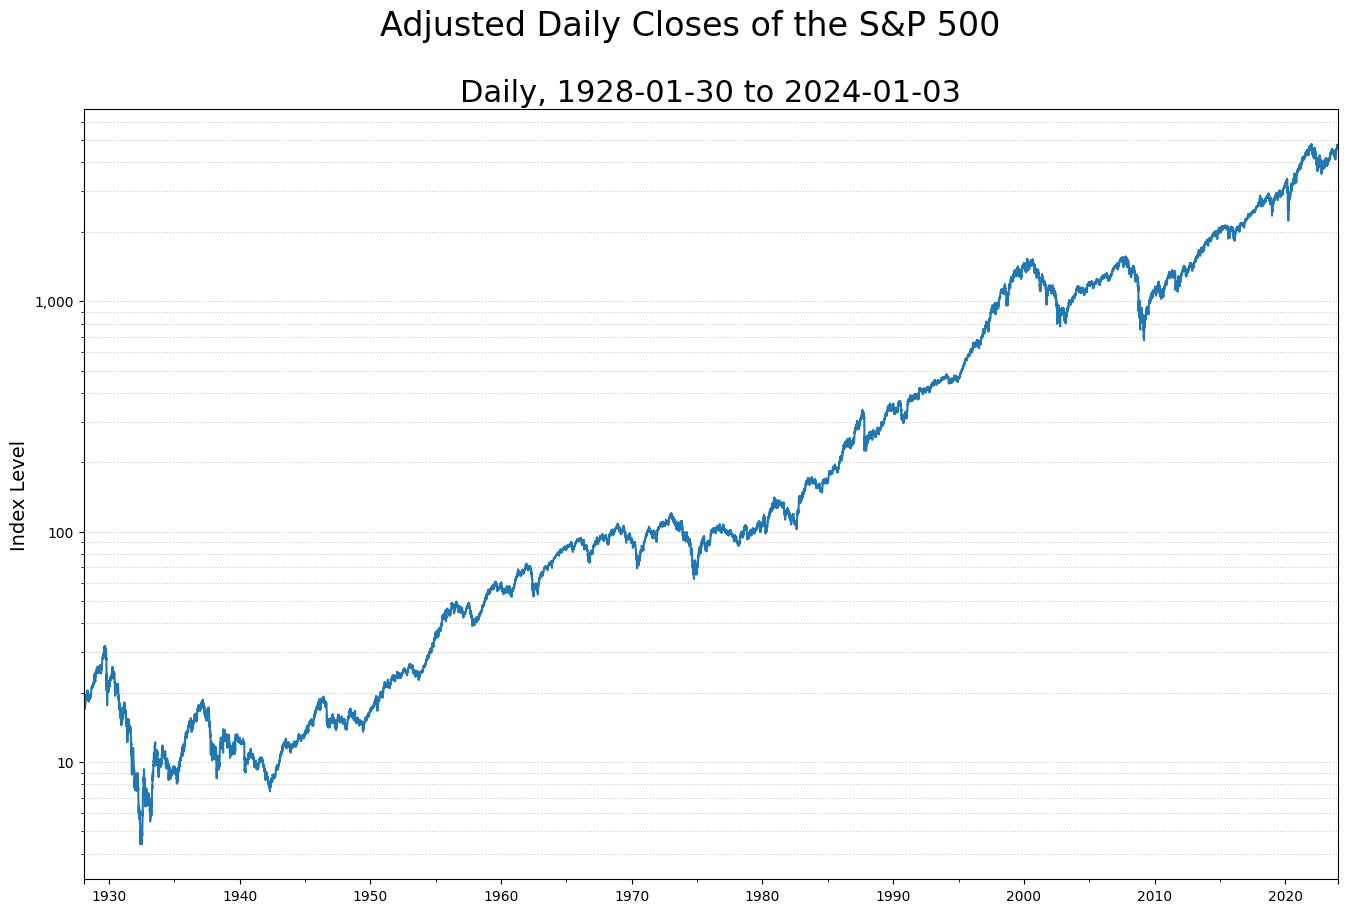

In [4]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
df['Adj Close'].plot(ax=plot)
title='Adjusted Daily Closes of the S&P 500'
figure.suptitle(title,fontsize=24)
plot.set_title("Daily, %s to %s" % (df.index[0],df.index[-1]),fontsize=22)
plot.set_yscale('log')
plot.yaxis.set_major_formatter(CountLabels())
plot.set_ylabel('Index Level',fontsize=14)
plot.set_xlabel(None)
plot.grid(visible=True,which='both',axis='y',alpha=0.2,color='black',linestyle=':')
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

Again, there's a lot going on in that code, so let's go through it in detail. First we make a `figure` and `plot` with the `pl.subplots()` call. This figure has the famous *golden ratio* for its aspect ratio which I hope you agree with Leonardo da Vinci, and others, gives it an appealing look and feel.
We then ask `pandas` to plot the data for us, passing through the `plot` object as an argument, via `ax=plot`. This makes sure `pandas` draws on the canvas we just stretched out to use. I set the figure title and subtitle, taking care that the title string will be available to name the file I'm going to write out at the end of the code. I set the *y*-axis to a logarithmic scale, to more accurately display the dynamics of the data, and load up a `formatter` to write the tick-marks in a suitably appealing format. (This is an Anglocentric format, so my apologies to the *Systeme Internationale*, but it can be changed by making a new class object within `my_library.py` to anything you want!) Note that, since the `x`-axis of the plot has been set to a suitable scaling automatically because we told pandas that it was made of timestamps, we don't need to also tell the viewer of the plot that the *x*-axis represents dates, so I strip that label. Since I am using a log-scale for the *y*-axis, I draw gridlines as they are a visual clue that this axis is not linear. That's important!

### Talking About the Data
Turning to look at the data plotted, rather than the code that made the plot, several features are clear. There are no, to the eye, obvious regions of bad data, although there are regions of volatility and quiescence. We should not be suprised by the fact that data starting _after_ the Wall St. Crash of 1929, shows a market going mostly downwards until about the mid-1940's where it turns around and marches upwards at a more-or-less similar daily rate for the next 80 years. I would not suggest this as an analytical techinique, but if you were to draw a line on the plot through thr 1980's and continue it through the dot-com boom, the Great Recession, and the COVID era, it would pretty much end up in the region of where we are today.

## The Market's Not Normal

However, let's now take a first stab at addressing the key reason why I'm writing this notebook, which is to drive a stake through the heart of the argument that the daily returns of the stock market are now, or have ever been, Normally distributed -- the assumption made by _almost_ everybody who does quantitative research, from those pricing options to econometricians and "factor modelers" to anybody minimizing the sum of the square of the residuals inside a machine learning or generative A.I. model. We'll do that by making a histogram of the daily returns, but we start by finding out the parameters of the "best fitting" Normal distribution, to use later.

In [ ]:
from scipy.stats import norm as density
feature=df['Daily Return']
mu,sigma=density.fit(feature)
model=density(mu,sigma)
nprint("""Fitted Mean and Standard Deviation of {:s}: ({:+.4f} %, {:.4f} %);
         Sample Size: {:,d}; Standard Error of the Mean: {:.4f} %; t Statistic: {:+6.3f}.""".format(
      feature.name,
      mu,
      sigma,
      len(feature),
      sigma/np.sqrt(len(feature)),
      mu/sigma*np.sqrt(len(feature))
))

17:59:41 Fitted Mean and Standard Deviation of Daily Return: (+0.0304 %,1.1969 %); 
         Sample Size: 24,097; Standard Error of the Mean: 0.0077 %; t Statistic: +3.936.


Let's make that histogram:

17:37:24 Fitted Mean and Standard Deviation of Daily Return: (+0.0304 %,1.1969 %); 
         Sample Size: 24,097; Standard Error of the Mean: 0.0077 %; t Statistic: +3.936.


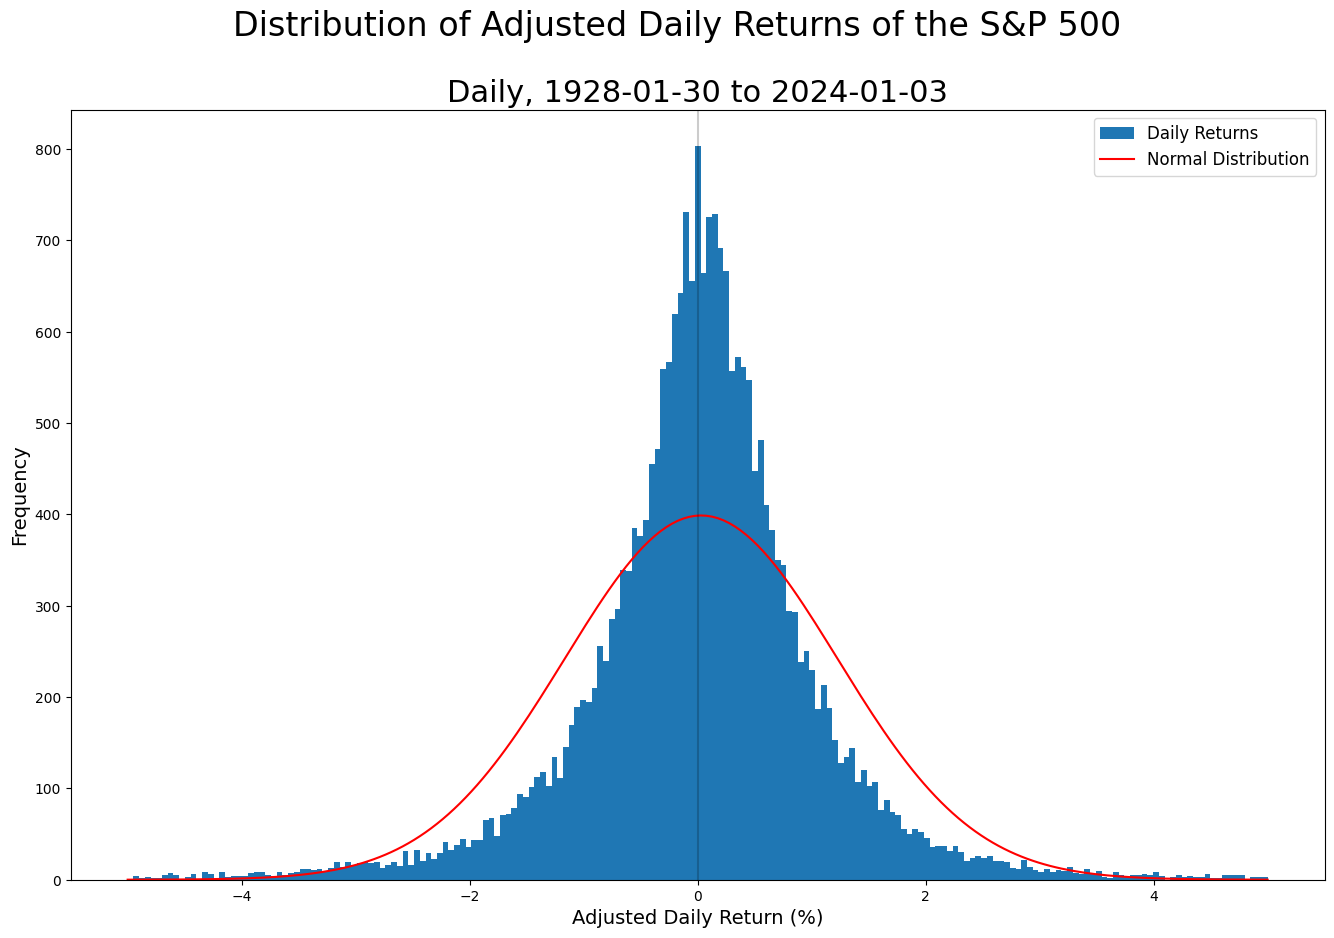

In [ ]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
samples,bins,patches=plot.hist(feature,bins=np.linspace(-five,five,200),label=('%ss' % feature.name))
plot.plot(bins,model.pdf(bins)*sum(samples)*(bins[-1]-bins[0])/len(bins),'-r',label="Normal Distribution")
title='Distribution of Adjusted %ss of the S&P 500' % feature.name
figure.suptitle(title,fontsize=24)
plot.set_title("Daily, %s to %s" % (df.index[0],df.index[-1]),fontsize=22)
plot.set_ylabel('Frequency',fontsize=14)
plot.set_xlabel('Adjusted %s (%%)' % feature.name,fontsize=14)
plot.yaxis.set_major_formatter(CountLabels())
plot.axvline(color='black',alpha=0.2)
plot.legend(loc='upper right',fontsize=12)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

Again, there's a lot of code here, but we've seen most of it before. The key lines are the call to the `.hist()` method of the `plot` object, with user-specified bins (200, between -5% and +5%) created via `np.linspace()`. This method returns a tuple of results that we scoop up into `samples,bins,patches`. These represent the bin counts, bin edges, and the graphical objects that are the bars to draw. We will use samples and bins to plot a properly normalized rendition of the best fitting Normal distribution as a line overlaying the histogram, which is done via the _xy_-plotting method `.plot()`.

###Talking About the Histogram
Without doing statistical tests, let's talk _qualitatively_ about this histogram:
1. The data shows a pretty symmetrical distribution, centered close to zero, with a sharp peak, thin sides, and wide tails.
2. In contrast, the _best fitting_ Normal distribution is broad and smoothly peaked and overlaps the histogram _almost nowhere_.

Relative to the Normal, there is too much data in the far tails, too little on the sides, and too much around the center. **The histogram does not match the fitted line anywhere, really.** There are clearly statistical fluctuations in the bin counts, as we would expect, but they are nowhere near large enough to explain the distributional mismatch.

### The Alternate Hypothesis
So "most quants" I've spoken too generally react as follows when I show them this picture:

> Graham: Look at this, the market's not Normal!

> Quant:  Yeah, duh, of course. We know that. But it's sort of ok, and it's a useful model. You talk about George Box all the time, you know what he said.

> Graham: Ok, I hear you, but I can find a much more useful model with almost no effort! Take a look at this…

What I'm going to show is the same data analyzed the same way but fitted to the _Generalized Error distribution_ instead. This is available in `scipy.stats` as `gennorm(beta)` and so has just one more parameter than the Normal. The really useful thing about the _GED_ is that it includes both the Normal and Laplace distributions of special cases, with _β_=2 for the former and _β_=1 for the latter. This means we can parametrically test the data for Normality by performing either the _Wald test_, which relies on the asymptotic properties of maximum likelihood estimators, or the _Maximum Likelihood Ratio test_, which does not rely on asymptotics. But I will leave those tests for the next article, in this one I'm just going to make the plot.

As before, the first thing to do is fit the new probability density function to the same data.

In [15]:
from scipy.stats import gennorm as density
feature=df['Daily Return']
beta,mu,sigma=density.fit(feature)
model=density(beta,mu,sigma)
nprint("""Fitted Mean and Standard Deviation of {:s}: ({:+.4f} %, {:.4f} %);
         Fitted Kurtosis Parameter: {:.4f};
         Sample Size: {:,d}.""".format(
      feature.name,
      model.mean(),
      model.std(),
      beta,
      len(feature)
))

21:04:06 Fitted Mean and Standard Deviation of Daily Return: (+0.0487 %, 1.1275 %);
         Fitted Kurtosis Parameter: 0.8496;
         Sample Size: 24,097.


This fits a distribution with a larger mean, at 5 bp per day, and slightly smaller standard deviation, of 1.1% per day. An investor who models the data this way, choosing holdings that are--in some manner--an increasing function of the expected return would on average be longer the market than the student of the Normal distribution.

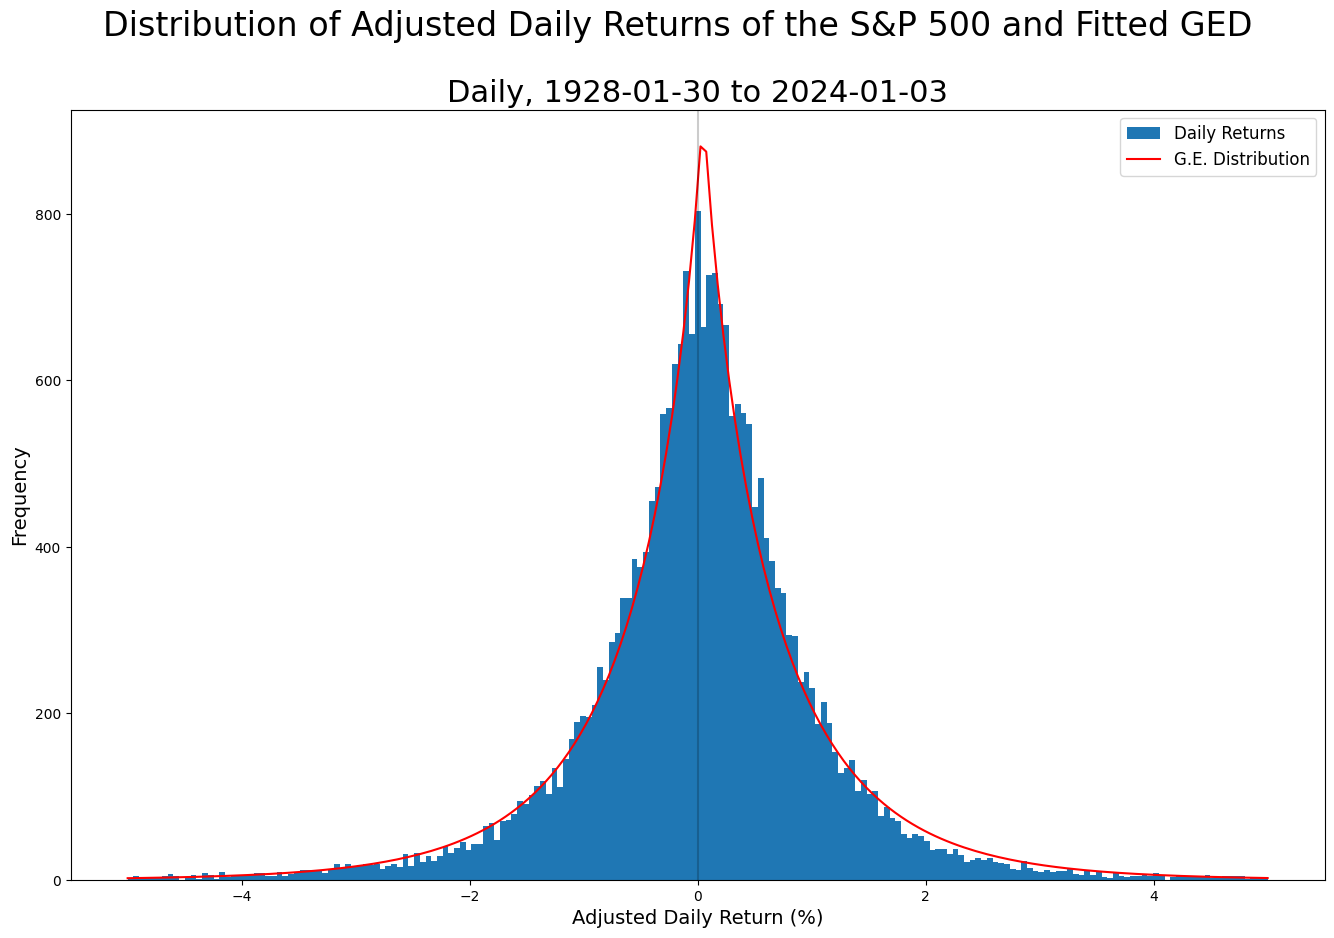

In [10]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
samples,bins,patches=plot.hist(feature,bins=np.linspace(-five,five,200),label=('%ss' % feature.name))
plot.plot(bins,model.pdf(bins)*sum(samples)*(bins[-1]-bins[0])/len(bins),'-r',label="G.E. Distribution")
title='Distribution of Adjusted %ss of the S&P 500 and Fitted GED' % feature.name
figure.suptitle(title,fontsize=24)
plot.set_title("Daily, %s to %s" % (df.index[0],df.index[-1]),fontsize=22)
plot.set_ylabel('Frequency',fontsize=14)
plot.set_xlabel('Adjusted %s (%%)' % feature.name,fontsize=14)
plot.yaxis.set_major_formatter(CountLabels())
plot.axvline(color='black',alpha=0.2)
plot.legend(loc='upper right',fontsize=12)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

I think this plot is quite convincing. It is not enough to reject a Null Hypothesis, we also have to have something to replace it with. This is not perfect, but it clearly does a much better job of describing the data. There's really no comparison.